In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import funciones as fs

In [2]:
df_finaldemo = pd.read_csv("df_final_demo.csv")
df_finaldemo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [3]:
print(df_finaldemo.shape)
print(df_finaldemo.info())
print(df_finaldemo.describe(include='all'))

(70609, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
None
           client_id  clnt_tenure_yr  clnt_tenure_mnth      clnt_age  gendr  \
count   7.060900e+04    70595.000000      70595.000000  70594.000000  70595   
unique           NaN             NaN               NaN           NaN      4   
top              NaN             NaN               NaN      

In [4]:
df_finaldemo = df_finaldemo.rename(columns={'clnt_tenure_yr': 'tenure_year', 'clnt_tenure_mnth': 'tenure_month', 'clnt_age': 'age', 'gendr': 'gender', 'num_accts': 'num_accounts'})

In [5]:
print(df_finaldemo['bal'].min())
print(df_finaldemo['bal'].max())
print(df_finaldemo['bal'].mean())
print(df_finaldemo['age'].median())

13789.419999999998
16320040.15
147445.2406414052
47.0


In [6]:
df_finaldemo.isna().sum()

client_id         0
tenure_year      14
tenure_month     14
age              15
gender           14
num_accounts     14
bal              14
calls_6_mnth     14
logons_6_mnth    14
dtype: int64

In [7]:
df_finaldemo.nunique()

client_id        70609
tenure_year         54
tenure_month       482
age                165
gender               4
num_accounts         8
bal              70328
calls_6_mnth         8
logons_6_mnth        9
dtype: int64

In [8]:
# Algunos float que deberían ser int.
# Gender tiene 4 valores diferentes. 
# No hay client_id duplicados. 70609 únicos en una tabla de 70609 filas.
# Mínimo de 13.5 de edad. Habrá que limpiar decimales y no contar age<18?
# Algunos nulos (14-15) menos en client_id.

In [9]:
df_finaldemo['num_accounts'] = df_finaldemo['num_accounts'].astype("Int64")
df_finaldemo['calls_6_mnth'] = df_finaldemo['calls_6_mnth'].astype("Int64")
df_finaldemo['logons_6_mnth'] = df_finaldemo['logons_6_mnth'].astype("Int64")
df_finaldemo.dtypes

client_id          int64
tenure_year      float64
tenure_month     float64
age              float64
gender            object
num_accounts       Int64
bal              float64
calls_6_mnth       Int64
logons_6_mnth      Int64
dtype: object

In [10]:
df_finaldemo['tenure_year'] = df_finaldemo['tenure_year'].round(0).astype('Int64')
df_finaldemo['tenure_month'] = df_finaldemo['tenure_month'].round(0).astype('Int64')
df_finaldemo['age'] = df_finaldemo['age'].round(0).astype('Int64')
df_finaldemo.head()

,client_id,tenure_year,tenure_month,age,gender,num_accounts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,U,2,45105.30,6,9
1,2304905,7,94,58,U,2,110860.30,6,9
2,1439522,5,64,32,U,2,52467.79,6,9
3,1562045,16,198,49,M,2,67454.65,3,6
4,5126305,12,145,33,F,2,103671.75,0,3


In [11]:
df_finaldemo['gender'].unique()

array(['U', 'M', 'F', nan, 'X'], dtype=object)

In [12]:
df_finaldemo['gender'].value_counts(dropna=False)

gender
U      24122
M      23724
F      22746
NaN       14
X          3
Name: count, dtype: int64

In [13]:
df_finaldemo['gender'] = (df_finaldemo['gender'].astype("string").str.strip().str.upper().replace("X", "U").fillna("U"))
# U = Unknown

Vamos a concretar los clientes principales:

In [14]:
counts_gender = df_finaldemo['gender'].value_counts(dropna=False).sort_index()
percent_gender = (df_finaldemo['gender'].value_counts(normalize=True).sort_index() * 100).round(2)

pd.concat([counts_gender, percent_gender], axis=1, keys=['count', 'percentage'])

,count,percentage
gender,,
F,22746,32.21
M,23724,33.6
U,24139,34.19


Ningún género domina claramente. La distribución es bastante equilibrada, aproximadamente un tercio para cada género y el último tercio para género no especificado. Esto indica que el proceso online lo utilizan distintos perfiles de género, sin ninguno que destaque.

In [15]:
age_median = df_finaldemo['age'].median()
tenure_median = df_finaldemo['tenure_year'].median()

print(f"La mediana de edad es: {age_median}")
print(f"La mediana de años de antigüedad es: {tenure_median}")

La mediana de edad es: 47.0
La mediana de años de antigüedad es: 11.0


In [16]:
mediana_total = df_finaldemo['age'].median()
mediana_adultos = df_finaldemo[df_finaldemo['age'] >= 18]['age'].median()

print(f"Mediana con todos: {mediana_total}")
print(f"Mediana solo adultos: {mediana_adultos}")

Mediana con todos: 47.0
Mediana solo adultos: 47.0


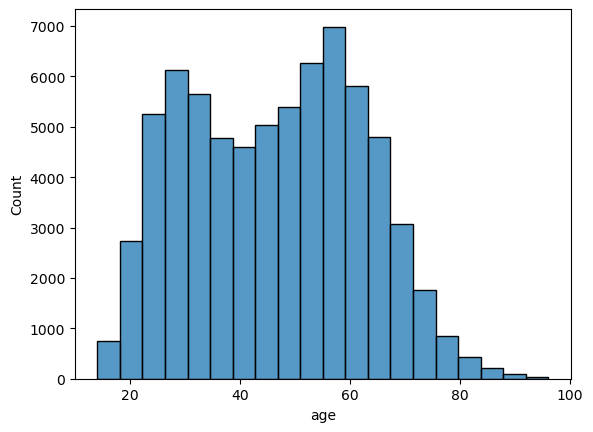

In [17]:
sns.histplot(df_finaldemo['age'], bins=20)
plt.show()

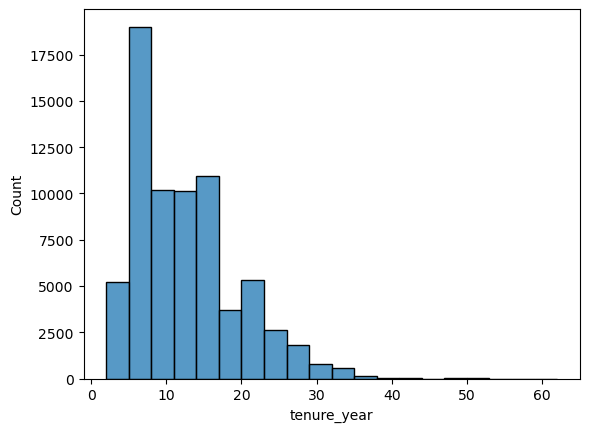

In [18]:
sns.histplot(df_finaldemo['tenure_year'], bins=20)
plt.show()

In [19]:
print(df_finaldemo['bal'].median())
print(df_finaldemo['bal'].quantile([0.25, 0.5, 0.75]))

63332.9
0.25     37346.835
0.50     63332.900
0.75    137544.905
Name: bal, dtype: float64


El balance de las cuentas muestra una segmentación clara: mientras que el cliente mediano mantiene un balance de ~$36k, el 25% superior(Q3) gestiona patrimonios por encima de los $137k.

In [20]:
counts = df_finaldemo['num_accounts'].value_counts().sort_index()
percent = ((df_finaldemo['num_accounts'].value_counts(normalize=True).sort_index() * 100).round(3))

pd.concat([counts, percent], axis=1, keys=['count', 'percentage'])

,count,percentage
num_accounts,,
1,2,0.003
2,55497,78.613
3,12529,17.748
4,2241,3.174
5,284,0.402
6,33,0.047
7,8,0.011
8,1,0.001


El 78% solo tiene 1 o 2 cuentas.

In [21]:
bins = [0, 18, 35, 60, df_finaldemo["age"].max()]
labels = ['Under 18', 'Young Adult', 'Adult', 'Senior']
df_finaldemo['age_category'] = pd.cut(df_finaldemo['age'], bins=bins, labels=labels, include_lowest=True)
df_finaldemo['age_category'].value_counts()

age_category
Adult          34759
Young Adult    20373
Senior         14720
Under 18         742
Name: count, dtype: int64

In [22]:
(df_finaldemo['age_category'].value_counts(normalize=True) * 100).round(2)


age_category
Adult          49.24
Young Adult    28.86
Senior         20.85
Under 18        1.05
Name: proportion, dtype: float64

Aunque el intervalo 35-60 años abarca un rango más amplio que otras categorías, la mediana de edad (47 años) confirma que el cliente típico se sitúa dentro de este grupo.

In [23]:
bins_tenure = [0, 5, 10, 20, df_finaldemo["tenure_year"].max()]
labels_tenure = ['New', 'Intermediate', 'Long Term', 'Veteran']
df_finaldemo['tenure_category'] = pd.cut(df_finaldemo['tenure_year'], bins=bins_tenure, labels=labels_tenure, include_lowest=True)
df_finaldemo['tenure_category'].value_counts()

tenure_category
Long Term       26394
Intermediate    22224
New             12172
Veteran          9805
Name: count, dtype: int64

In [24]:
(df_finaldemo['tenure_category'].value_counts(normalize=True) * 100).round(2)

tenure_category
Long Term       37.39
Intermediate    31.48
New             17.24
Veteran         13.89
Name: proportion, dtype: float64

El perfil predominante en el proceso digital de Vanguard es el de un inversor adulto y con trayectoria en la entidad. Casi la mitad de los usuarios tiene entre 35 y 60 años, con una edad mediana de 47 años. Esta madurez se refleja también en la fidelidad, ya que la mayoría mantiene una relación de largo plazo con la compañía, con una antigüedad mediana de 11 años.

En términos financieros, son clientes con saldos medianos de 63.000 dólares y estructuras de inversión sencillas, generalmente de dos cuentas. La distribución de género es equitativa, lo que confirma que la plataforma tiene un alcance común para todos los perfiles de género. En conclusión, el sistema online es utilizado principalmente por clientes consolidados y con experiencia previa en la plataforma, por encima de perfiles jóvenes o nuevos usuarios.